In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 1)

folder = './052018_plate1/'

path_cyt = folder + 'Cytoplasm_Cancer_May2018_1.xlsx'

markers = ['Cell ID', 
           'Nucleus (Cycle 1 - DAPI)',
           'BT474-H2BeGFP (Cycle 1 - FITC)', 
           'MCL1 (Cycle 2 - Cy3)', 
           'p-p65NFkB (Cycle 2 - Cy5)', 
           'p-Akt (Cycle 3 - FITC)',
           'aSMA (Cycle 3 - Cy3)',
           'p-gH2AX (Cycle 3 - Cy5)',
           'GRP78 (Cycle 4 - FITC)',
           'Vimentin (Cycle 4 - Cy3)',
           'Ki67 (Cycle 5 - FITC)',
           'p-Rb (Cycle 5 - Cy3)',
           'FN (Cycle 5 - Cy5)',
           'FAP (Cycle 6 - Cy3)',
           'SOX2 (Cyccle 6 - Cy5)']

tabs = ['BT474,Cntrl(rb,c2-4)', 
        'BT474,30nM(rb,c5-7)',
        'BT474,300nM(rb,c8-10)',
        
        'BT474+C3H-scr,Cntrl(rc,c2-4)',
        'BT474+C3H-scr,30nM(rc,c5-7)',
        'BT474+C3H-scr,300nM(rc,c8-10)',
        
        'BT474+C3H-1,Cntrl(rd,c2-4)',
        'BT474+C3H-1,30nM(rd,c5-7)',
        'BT474+C3H-1,300nM(rd,c8-10)',
        
        'BT+AR22,Cntrl(re,c2-4)',
        'BT+AR22,30nM(re,c5-7)',
        'BT+AR22,300nM(re,c8-10)',
        
        'BT+hMSC,Cntrl(rf,c2-4)',
        'BT+hMSC,30nM(rf,c5-7)',
        'BT+hMSC,300nM(rf,c8-10)']

def concat_df(path):
    dt = []
    for t in tabs:
        dt.append(pd.read_excel(open(path, 'rb'), sheet_name=t, names=markers))
    df = pd.concat(dt, ignore_index=True)
    return df

In [2]:
df_cyt = concat_df(path_cyt)
df_cyt['Group'] = df_cyt['Cell ID'].apply(lambda x: ((x // 10**9) % 10 - 1) // 3)
print('*** Cytoplasm Dataset:')
df_cyt

*** Cytoplasm Dataset:


,Cell ID,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cyccle 6 - Cy5),Group
0,11100020033,312344.6,234859.4,108887.6,96656.4,30002.3,30046.4,17766.9,25686.6,22498.5,16724.2,17041.8,12423.0,28935.0,18285.6,0
1,11100030032,385528.7,143962.8,39818.8,28364.5,20245.2,18019.9,25132.2,19148.2,15581.4,21451.7,16703.0,15742.8,30064.2,21675.8,0
2,11100040029,304401.9,109639.0,82218.6,61628.7,31035.5,32164.7,19453.0,16561.2,19694.2,24001.3,13031.8,13401.1,24950.5,16400.8,0
3,11100050033,668529.0,297478.1,97809.4,101615.6,48579.1,73095.8,39959.7,33319.4,69094.3,44884.1,22708.2,48631.7,47353.1,30894.6,0
4,11100060030,320494.5,165331.3,45936.9,38619.1,22015.4,35396.2,14676.4,18876.5,15788.6,19944.6,12743.1,64004.3,26933.0,15586.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303741,59904821031,620840.6,40577.8,42276.7,22389.8,20913.4,15832.8,12057.1,5326.0,14498.9,22489.2,11989.2,17799.1,53133.3,13064.1,2
303742,59904831032,646162.1,42222.4,29269.5,17659.9,18419.8,18896.9,13745.8,7355.2,17271.0,22747.3,23024.1,15925.3,21125.6,13884.2,2
303743,59904841033,690329.7,29714.4,41013.4,25713.0,22299.8,13214.3,13583.7,18234.7,17631.9,18664.3,13746.7,16720.0,17803.4,10993.3,2
303744,59904851034,803421.6,83582.2,76132.7,39671.9,35083.7,31826.0,20164.5,10932.1,23628.6,29628.7,38979.1,26454.2,29472.5,19947.2,2


In [3]:
# All columns in the Cytoplasm dataset's information
df_cyt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303746 entries, 0 to 303745
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Cell ID                         303746 non-null  int64  
 1   Nucleus (Cycle 1 - DAPI)        303746 non-null  float64
 2   BT474-H2BeGFP (Cycle 1 - FITC)  303746 non-null  float64
 3   MCL1 (Cycle 2 - Cy3)            303746 non-null  float64
 4   p-p65NFkB (Cycle 2 - Cy5)       303746 non-null  float64
 5   p-Akt (Cycle 3 - FITC)          303746 non-null  float64
 6   aSMA (Cycle 3 - Cy3)            303746 non-null  float64
 7   p-gH2AX (Cycle 3 - Cy5)         303746 non-null  float64
 8   GRP78 (Cycle 4 - FITC)          303746 non-null  float64
 9   Vimentin (Cycle 4 - Cy3)        303746 non-null  float64
 10  Ki67 (Cycle 5 - FITC)           303746 non-null  float64
 11  p-Rb (Cycle 5 - Cy3)            303746 non-null  float64
 12  FN (Cycle 5 - Cy

In [4]:
# Check if duplicate ID exists in Cytoplasm dataset
df_cyt['Cell ID'].value_counts()

25905600509    1
32304840327    1
27409320820    1
28401010115    1
41502200703    1
              ..
14700060041    1
32202360202    1
41501660552    1
23205590412    1
24207400553    1
Name: Cell ID, Length: 303746, dtype: int64

In [5]:
df_cyt['Group'].value_counts()

0    112087
1     96442
2     95217
Name: Group, dtype: int64

In [6]:
# Cytoplasm markers' statistics
df_cyt[df_cyt.columns[1:-1]].describe()

,Nucleus (Cycle 1 - DAPI),BT474-H2BeGFP (Cycle 1 - FITC),MCL1 (Cycle 2 - Cy3),p-p65NFkB (Cycle 2 - Cy5),p-Akt (Cycle 3 - FITC),aSMA (Cycle 3 - Cy3),p-gH2AX (Cycle 3 - Cy5),GRP78 (Cycle 4 - FITC),Vimentin (Cycle 4 - Cy3),Ki67 (Cycle 5 - FITC),p-Rb (Cycle 5 - Cy3),FN (Cycle 5 - Cy5),FAP (Cycle 6 - Cy3),SOX2 (Cyccle 6 - Cy5)
count,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,303746.0,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05,3.0e+05
mean,6.4e+05,8.5e+04,1.6e+05,1.2e+05,4.6e+04,4.8e+04,2.5e+04,27734.2,2.9e+04,2.8e+04,2.5e+04,2.4e+04,4.0e+04,2.3e+04
std,5.2e+05,1.3e+05,1.2e+05,1.3e+05,4.0e+04,5.9e+04,2.1e+04,29294.2,2.9e+04,1.7e+04,2.9e+04,2.8e+04,6.2e+04,3.3e+04
min,3.4e+04,7.4e+03,1.2e+04,3.9e+03,0.0e+00,0.0e+00,0.0e+00,0.0,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00
25%,3.4e+05,2.6e+04,7.4e+04,2.6e+04,2.3e+04,2.1e+04,1.7e+04,11156.3,1.8e+04,1.9e+04,1.5e+04,1.6e+04,2.8e+04,1.6e+04
50%,4.9e+05,3.9e+04,1.2e+05,5.9e+04,3.2e+04,3.1e+04,2.1e+04,18264.4,2.3e+04,2.4e+04,2.0e+04,2.0e+04,3.4e+04,1.9e+04
75%,7.5e+05,7.7e+04,2.0e+05,1.7e+05,5.4e+04,5.4e+04,2.9e+04,31722.4,3.3e+04,3.2e+04,2.8e+04,2.6e+04,4.4e+04,2.4e+04
max,2.2e+07,3.7e+06,5.0e+06,3.0e+06,1.3e+06,4.6e+06,1.7e+06,775979.2,2.9e+06,2.8e+06,6.2e+06,8.6e+06,1.0e+07,3.0e+06


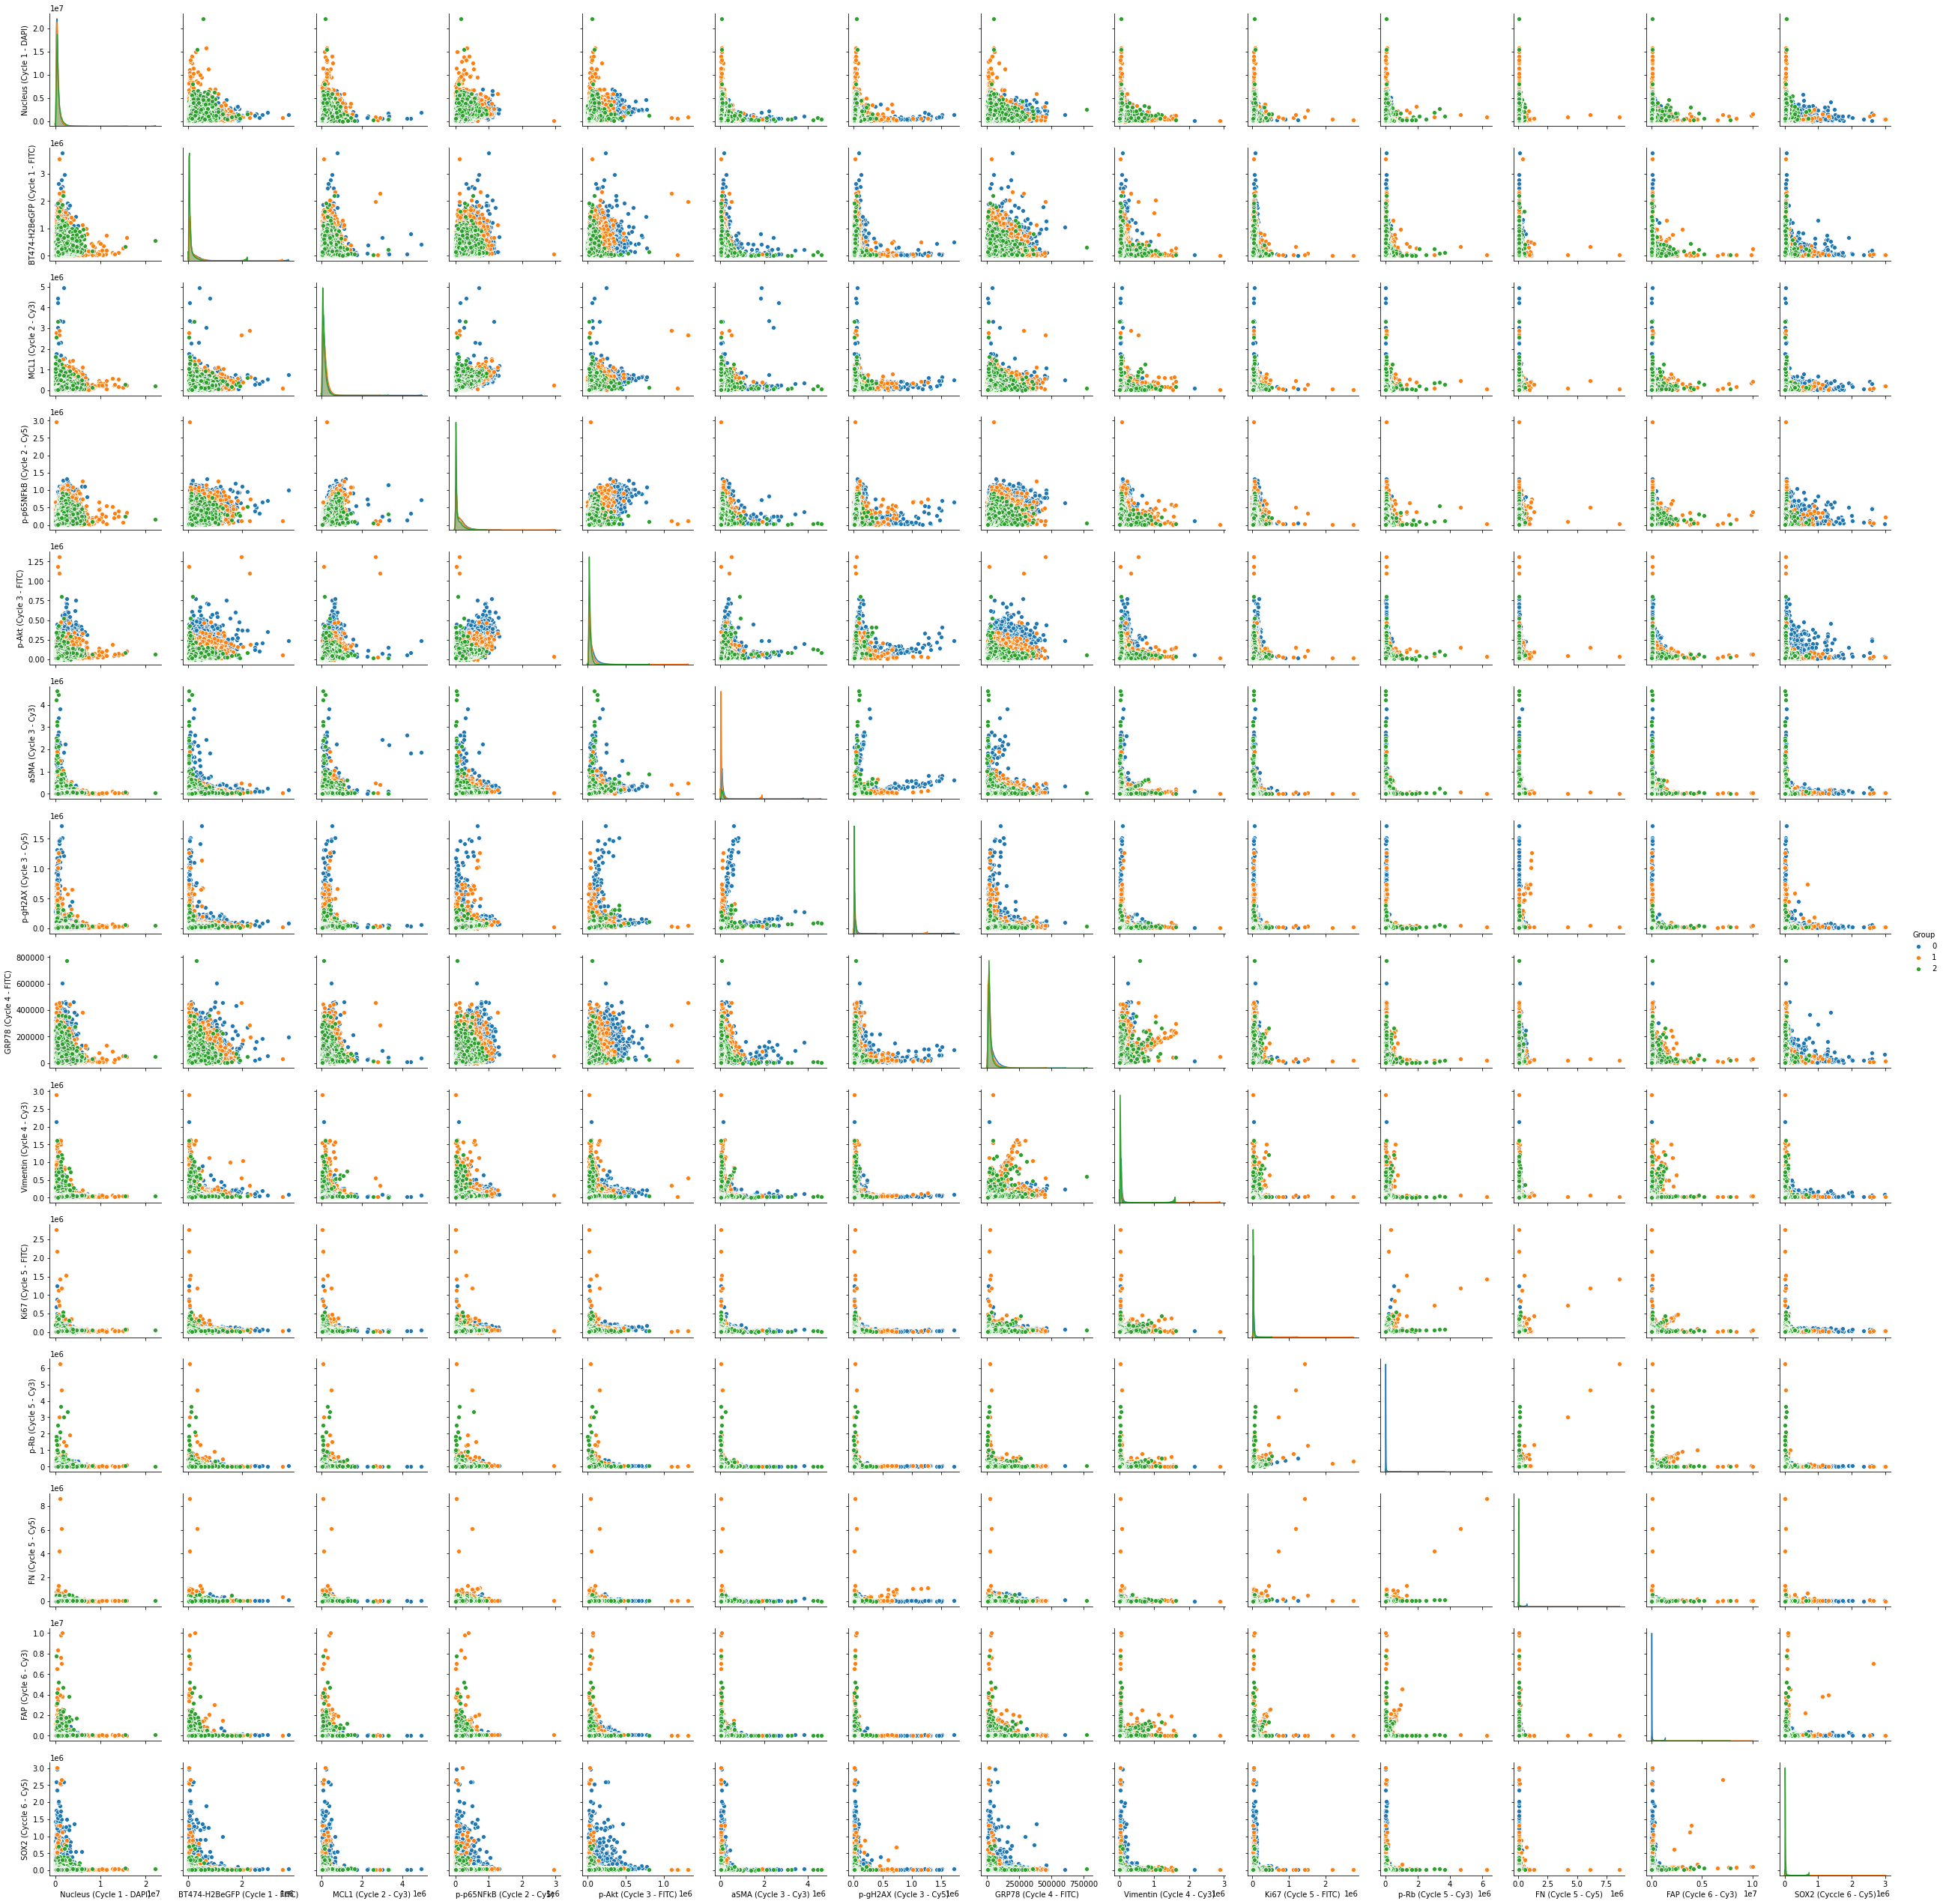

In [7]:
sns.pairplot(data=df_cyt, vars=df_cyt.columns[1:-1], hue='Group');